docker run -p 8888:8888 -p 6006:6006 -v /c/Users/Elvis/Dropbox/CAS_Statistical_Modelling/Musik/:/notebooks/ -it oduerr/tf_docker
#Py 2!!!!

In [1]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /usr/local/lib/python2.7/dist-packages


In [2]:
!pip install keras==1.1.1
#1.1.1 works

In [3]:
!pip install librosa

In [4]:
import keras
import numpy as np

Using TensorFlow backend.


In [5]:
!apt-get update

Ign http://archive.ubuntu.com trusty InRelease
Hit http://archive.ubuntu.com trusty-updates InRelease
Hit http://archive.ubuntu.com trusty-security InRelease
Hit http://archive.ubuntu.com trusty Release.gpg  
Hit http://archive.ubuntu.com trusty Release      
Hit http://archive.ubuntu.com trusty-updates/main Sources
Hit http://archive.ubuntu.com trusty-updates/restricted Sources
Hit http://archive.ubuntu.com trusty-updates/universe Sources
Hit http://archive.ubuntu.com trusty-updates/main amd64 Packages
Hit http://archive.ubuntu.com trusty-updates/restricted amd64 Packages
Hit http://archive.ubuntu.com trusty-updates/universe amd64 Packages
Hit http://archive.ubuntu.com trusty-security/main Sources
Hit http://archive.ubuntu.com trusty-security/restricted Sources
Hit http://archive.ubuntu.com trusty-security/universe Sources
Hit http://archive.ubuntu.com trusty-security/main amd64 Packages
Hit http://archive.ubuntu.com trusty-security/restricted amd64 Packages
Hit http://archive.ubuntu.

In [6]:
!apt-get install -y libav-tools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libav-tools is already the newest version.
0 upgraded, 0 newly installed, 0 to remove and 86 not upgraded.


In [7]:
!cat /etc/*-release

DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=14.04
DISTRIB_CODENAME=trusty
DISTRIB_DESCRIPTION="Ubuntu 14.04.5 LTS"
NAME="Ubuntu"
VERSION="14.04.5 LTS, Trusty Tahr"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 14.04.5 LTS"
VERSION_ID="14.04"
HOME_URL="http://www.ubuntu.com/"
SUPPORT_URL="http://help.ubuntu.com/"
BUG_REPORT_URL="http://bugs.launchpad.net/ubuntu/"


In [8]:
!apt-get install -y python-audioread 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-audioread is already the newest version.
0 upgraded, 0 newly installed, 0 to remove and 86 not upgraded.


In [9]:
!pip install tensorflow==0.12.0

In [10]:
import sys
sys.path.append("/notebook/music-auto_tagging-keras/")

In [11]:
from keras.applications.music_tagger_crnn import MusicTaggerCRNN
from keras.applications.music_tagger_crnn import preprocess_input, decode_predictions

In [12]:
import tensorflow as tf

In [13]:
tf.__version__

'0.12.0'

In [14]:
import keras
keras.__version__

'1.1.1'

In [15]:
model = MusicTaggerCRNN("msd")

In [16]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 96, 1366, 1)   0                                            
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 96, 1440, 1)   0           input_1[0][0]                    
____________________________________________________________________________________________________
bn_0_freq (BatchNormalization)   (None, 96, 1440, 1)   2880        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
conv1 (Convolution2D)            (None, 96, 1440, 64)  640         bn_0_freq[0][0]                  
___________________________________________________________________________________________

In [17]:
! git clone https://github.com/keunwoochoi/music-auto_tagging-keras

fatal: destination path 'music-auto_tagging-keras' already exists and is not an empty directory.


In [18]:
!pwd

/notebooks


In [19]:
audio_path = "/notebooks/music-auto_tagging-keras/data/bensound-thejazzpiano.mp3"
melgram = preprocess_input(audio_path)
melgrams = np.expand_dims(melgram, axis=0)

In [20]:
feats = model.predict(melgrams)
print('Features:')
print(feats)
print(feats.shape)

Features:
[[  2.38822699e-02   1.44260256e-02   2.88026873e-02   2.09411327e-02
    2.68865407e-01   3.78720835e-02   2.54575051e-02   1.46105411e-02
    6.10654755e-03   1.37441263e-01   7.55245006e-03   3.08891525e-03
    1.08704120e-01   2.32425146e-03   8.67738680e-04   8.14383663e-03
    5.14499238e-03   7.35228928e-03   1.02780961e-01   2.84744008e-03
    3.63156013e-03   9.10214707e-03   2.46136598e-02   2.99826767e-02
    2.14174041e-03   5.21474460e-04   5.16668661e-03   1.48019509e-03
    5.84501848e-02   3.53895361e-03   3.71221900e-02   4.32249578e-03
    6.65935129e-03   6.27342984e-02   5.25268086e-04   4.64719161e-03
    2.10093916e-03   4.54576407e-03   6.61023054e-03   1.10023620e-03
    2.06356607e-02   3.79242375e-02   6.80807047e-04   4.87962272e-03
    2.58119107e-04   6.20759604e-03   2.28708400e-03   1.90901617e-03
    1.28922556e-02   1.24682614e-03]]
(1, 50)


In [21]:
feats = model.predict(melgrams)
print('Features:')
print(decode_predictions(feats,top_n=50))

Features:
[[('electronic', 0.26886541), ('jazz', 0.13744126), ('chillout', 0.10870412), ('electronica', 0.10278096), ('Hip-Hop', 0.062734298), ('ambient', 0.058450185), ('electro', 0.037924238), ('female vocalists', 0.037872083), ('experimental', 0.03712219), ('instrumental', 0.029982677), ('alternative', 0.028802687), ('dance', 0.025457505), ('chill', 0.02461366), ('rock', 0.02388227), ('indie', 0.020941133), ('funk', 0.020635661), ('00s', 0.014610541), ('pop', 0.014426026), ('House', 0.012892256), ('90s', 0.0091021471), ('soul', 0.0081438366), ('beautiful', 0.0075524501), ('Mellow', 0.0073522893), ('guitar', 0.0066593513), ('sexy', 0.0066102305), ('rnb', 0.006207596), ('alternative rock', 0.0061065475), ('blues', 0.0051666866), ('indie rock', 0.0051449924), ('Progressive rock', 0.0048796227), ('party', 0.0046471916), ('easy listening', 0.0045457641), ('female vocalist', 0.0043224958), ('folk', 0.0036315601), ('acoustic', 0.0035389536), ('metal', 0.0030889153), ('80s', 0.0028474401), 

In [22]:
import glob
Songs=glob.glob("/notebooks/Radiohead - In Rainbows (2007) 320kbps/*.mp3")
for i in range(0,len(Songs)):
    audio_path = Songs[i]
    melgram = preprocess_input(audio_path)
    melgrams = np.expand_dims(melgram, axis=0)
    feats = model.predict(melgrams)
    print(Songs[i])
    print(decode_predictions(feats,top_n=4))[0]

/notebooks/Radiohead - In Rainbows (2007) 320kbps/01 15 Step.mp3
[('Hip-Hop', 0.10944935), ('electronic', 0.096248239), ('rock', 0.069782205), ('jazz', 0.056412973)]
/notebooks/Radiohead - In Rainbows (2007) 320kbps/02 Bodysnatchers.mp3
[('electronic', 0.15840343), ('instrumental', 0.10582788), ('jazz', 0.09705466), ('rock', 0.080024712)]
/notebooks/Radiohead - In Rainbows (2007) 320kbps/03 Nude.mp3
[('jazz', 0.29742691), ('female vocalists', 0.070285693), ('ambient', 0.065702647), ('instrumental', 0.063935451)]
/notebooks/Radiohead - In Rainbows (2007) 320kbps/04 Weird Fishes , Arpeggi.mp3
[('folk', 0.1913064), ('jazz', 0.1832438), ('rock', 0.17560732), ('instrumental', 0.1351234)]
/notebooks/Radiohead - In Rainbows (2007) 320kbps/05 All I Need.mp3
[('jazz', 0.28194261), ('Hip-Hop', 0.075582862), ('electronic', 0.072081134), ('instrumental', 0.058996737)]
/notebooks/Radiohead - In Rainbows (2007) 320kbps/06 Faust Arp.mp3
[('jazz', 0.52338117), ('instrumental', 0.11088909), ('guitar', 

In [23]:
import glob
Songs=glob.glob("/notebooks/The_Strokes_Discography/The_Strokes_Is_This_It/*.mp3")
for i in range(0,len(Songs)):
    audio_path = Songs[i]
    melgram = preprocess_input(audio_path)
    melgrams = np.expand_dims(melgram, axis=0)
    feats = model.predict(melgrams)
    print(Songs[i])
    print(decode_predictions(feats,top_n=4))[0]

/notebooks/The_Strokes_Discography/The_Strokes_Is_This_It/01 -  Is This It.mp3
[('jazz', 0.17453463), ('folk', 0.13267212), ('female vocalists', 0.086791009), ('rock', 0.082463212)]
/notebooks/The_Strokes_Discography/The_Strokes_Is_This_It/02 - The Modern Age.mp3
[('jazz', 0.3878985), ('folk', 0.14762282), ('instrumental', 0.11730416), ('guitar', 0.0832358)]
/notebooks/The_Strokes_Discography/The_Strokes_Is_This_It/03 - Soma.mp3
[('jazz', 0.40476453), ('instrumental', 0.14596514), ('folk', 0.095724665), ('guitar', 0.084771484)]
/notebooks/The_Strokes_Discography/The_Strokes_Is_This_It/04 - Barely Legal.mp3
[('Hip-Hop', 0.16997789), ('jazz', 0.12070934), ('electronic', 0.078585409), ('rock', 0.058492213)]
/notebooks/The_Strokes_Discography/The_Strokes_Is_This_It/05 - Someday.mp3
[('jazz', 0.35990071), ('electronic', 0.10624785), ('ambient', 0.061332271), ('chillout', 0.057902273)]
/notebooks/The_Strokes_Discography/The_Strokes_Is_This_It/06 - Alone, Together.mp3
[('electronic', 0.157293

In [24]:
import glob
Songs=glob.glob("/notebooks/Bob Marley & The Wailers - Exodus/*.mp3")
for i in range(0,len(Songs)):
    audio_path = Songs[i]
    melgram = preprocess_input(audio_path)
    melgrams = np.expand_dims(melgram, axis=0)
    feats = model.predict(melgrams)
    print(Songs[i])
    print(decode_predictions(feats,top_n=4))[0]

/notebooks/Bob Marley & The Wailers - Exodus/1-01 - Natural Mystic.mp3
[('Hip-Hop', 0.32147732), ('electronic', 0.1066392), ('rock', 0.079213232), ('alternative', 0.044349428)]
/notebooks/Bob Marley & The Wailers - Exodus/1-02 - So Much Things To Say.mp3
[('jazz', 0.17373747), ('female vocalists', 0.12095743), ('electronic', 0.084064618), ('folk', 0.040605389)]
/notebooks/Bob Marley & The Wailers - Exodus/1-03 - Guiltiness.mp3
[('electronic', 0.20556468), ('jazz', 0.1199967), ('ambient', 0.11702538), ('instrumental', 0.097390458)]
/notebooks/Bob Marley & The Wailers - Exodus/1-04 - The Heathen.mp3
[('jazz', 0.38675982), ('folk', 0.23429385), ('acoustic', 0.13202637), ('instrumental', 0.11778357)]
/notebooks/Bob Marley & The Wailers - Exodus/1-05 - Exodus.mp3
[('electronic', 0.24797554), ('jazz', 0.15230386), ('chillout', 0.15058906), ('electronica', 0.10014396)]
/notebooks/Bob Marley & The Wailers - Exodus/1-06 - Jamming.mp3
[('jazz', 0.2657488), ('electronic', 0.1109371), ('instrument

In [25]:
model = MusicTaggerCRNN(weights='msd',include_top=False)

In [26]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 96, 1366, 1)   0                                            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 96, 1440, 1)   0           input_2[0][0]                    
____________________________________________________________________________________________________
bn_0_freq (BatchNormalization)   (None, 96, 1440, 1)   2880        zeropadding2d_2[0][0]            
____________________________________________________________________________________________________
conv1 (Convolution2D)            (None, 96, 1440, 64)  640         bn_0_freq[0][0]                  
___________________________________________________________________________________________

In [27]:
Songs=glob.glob("/notebooks/Radiohead - In Rainbows (2007) 320kbps/*.mp3")
EMB1=np.zeros([len(Songs),32])
for i in range(0,len(Songs)):
    audio_path = Songs[i]
    melgram = preprocess_input(audio_path)
    melgrams = np.expand_dims(melgram, axis=0)
    EMB1[i,:] = model.predict(melgrams)
    print(i)

0
1
2
3
4
5
6
7
8
9


In [28]:
Songs=glob.glob("/notebooks/The_Strokes_Discography/The_Strokes_Is_This_It/*.mp3")
EMB2=np.zeros([len(Songs),32])
for i in range(0,len(Songs)):
    audio_path = Songs[i]
    melgram = preprocess_input(audio_path)
    melgrams = np.expand_dims(melgram, axis=0)
    EMB2[i,:] = model.predict(melgrams)
    print(i)

0
1
2
3
4
5
6
7
8
9
10


In [29]:
Songs=glob.glob("/notebooks/Bob Marley & The Wailers - Exodus/*.mp3")
EMB3=np.zeros([len(Songs),32])
for i in range(0,len(Songs)):
    audio_path = Songs[i]
    melgram = preprocess_input(audio_path)
    melgrams = np.expand_dims(melgram, axis=0)
    EMB3[i,:] = model.predict(melgrams)
    print(i)

0
1
2
3
4
5
6
7
8
9


In [30]:
EMB=np.vstack([EMB1,EMB2,EMB3])
EMB.shape

(31, 32)

In [31]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2)
tsne = model.fit_transform(EMB)

In [32]:
y=np.hstack([np.repeat(0,10),np.repeat(1,11),np.repeat(2,10)])


In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
%matplotlib inline

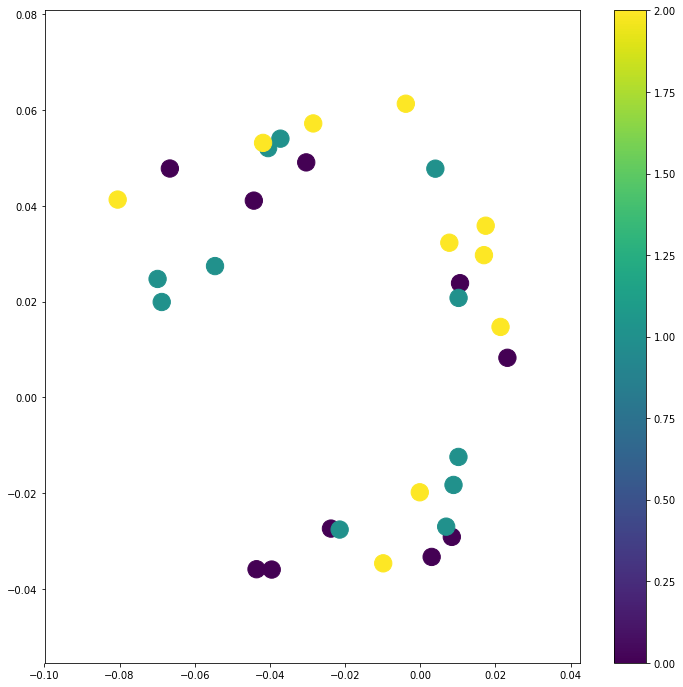

In [34]:
plt.figure(figsize=(12,12))
plt.scatter(x=tsne[:,0],y=tsne[:,1],c=y,s=300)
plt.colorbar()
#0 Radiohead 1 Strokes 2 Bob

In [35]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(EMB)
EMB = pca.transform(EMB)

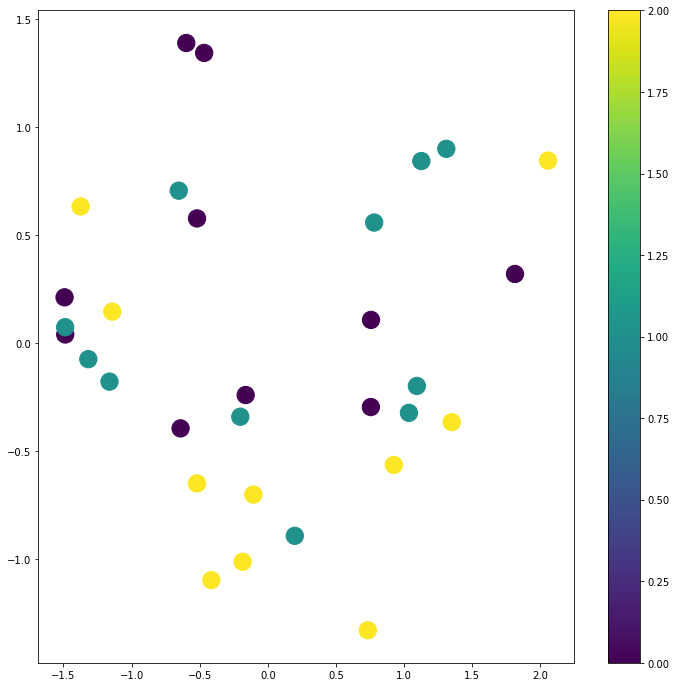

In [36]:
plt.figure(figsize=(12,12))
plt.scatter(x=EMB[:,0],y=EMB[:,1],c=y,s=300)
plt.colorbar()
#0 Radiohead 1 Strokes 2 Bob